In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
import numpy as np
import seaborn as sns
from lenskit.datasets import ML100K


### Load  preprocess data

In [2]:
# load original data
#orig_data = pd.read_csv('data/mini_ml100k_user_10_item_25.csv', sep=',', encoding='latin-1')
ml100k = ML100K('ml-100k')
orig_data = ml100k.ratings
orig_data = orig_data[['user', 'item', 'rating']]

In [10]:
def plot_distribution(df_orig, df_syn):   
    plt.plot(range(len(df_orig)), df_orig['counts'], label='Original')
    plt.fill_between(range(len(df_orig)), df_orig['counts'], color='#539ecd', alpha=0.5)

    plt.plot(range(len(df_syn)), df_syn['counts'], label='CTGAN')
    plt.fill_between(range(len(df_syn)), df_syn['counts'], color='#4cad6e', alpha=0.5)
    plt.legend(loc='upper right')


## 100 epoch

In [22]:
# load synthetic data
syn_data =  pd.read_csv('output/synthetic_data/syn_complete_070421_0935_combined_partition_100eps.csv', sep=';', encoding='latin-1')
syn_data = syn_data[['user', 'item', 'rating']]

### Rating Distribution

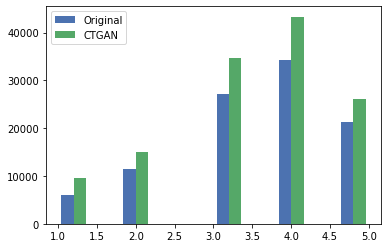

In [23]:
# plot rating distribution
plt.hist([orig_data['rating'], syn_data['rating']], label=['Original', 'CTGAN'])
plt.legend(loc='upper left')

### Item Distribution

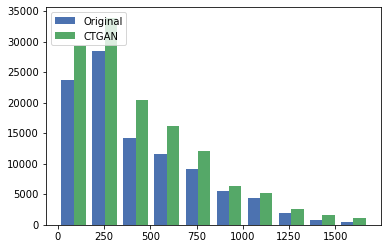

In [24]:
plt.hist([orig_data['item'], syn_data['item']], label=['Original', 'CTGAN'])
plt.legend(loc='upper left')

In [25]:
df_items_orig = orig_data.groupby('item').size().reset_index(name='counts')
df_items_orig = df_items_orig.sort_values(by='counts', ascending=False)
#df_items_orig.index.name = None

In [26]:
df_items_syn = syn_data.groupby('item').size().reset_index(name='counts')
df_items_syn = df_items_syn.sort_values(by='counts', ascending=False)

In [8]:
'''# Sort syn data based on the sorting used for the original data,
# to keep the ratings comparable per item.
combined_sorted = pd.merge(df_items_orig, df_items_syn, on="item", how="outer").fillna(0)
combined_sorted['idx'] = range(1, (len(df_items_orig)+1))
#combined_sorted
plt.plot(combined_sorted['idx'], combined_sorted['counts_x'], label='Original')
plt.fill_between(combined_sorted['idx'], combined_sorted['counts_x'], color='#539ecd', alpha=0.5)
plt.plot(combined_sorted['idx'], combined_sorted['counts_y'], label='CTGAN')
plt.fill_between(combined_sorted['idx'], combined_sorted['counts_y'], color='#4cad6e', alpha=0.5)
plt.legend(loc='upper right')'''

'# Sort syn data based on the sorting used for the original data,\n# to keep the ratings comparable per item.\ncombined_sorted = pd.merge(df_items_orig, df_items_syn, on="item", how="outer").fillna(0)\ncombined_sorted[\'idx\'] = range(1, (len(df_items_orig)+1))\n#combined_sorted\nplt.plot(combined_sorted[\'idx\'], combined_sorted[\'counts_x\'], label=\'Original\')\nplt.fill_between(combined_sorted[\'idx\'], combined_sorted[\'counts_x\'], color=\'#539ecd\', alpha=0.5)\nplt.plot(combined_sorted[\'idx\'], combined_sorted[\'counts_y\'], label=\'CTGAN\')\nplt.fill_between(combined_sorted[\'idx\'], combined_sorted[\'counts_y\'], color=\'#4cad6e\', alpha=0.5)\nplt.legend(loc=\'upper right\')'

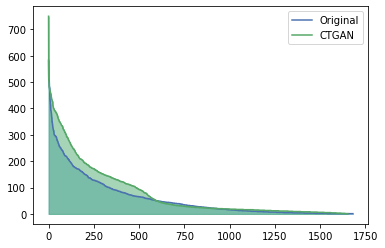

In [28]:
plot_distribution(df_items_orig, df_items_syn)

### User Distribution

In [29]:
df_users_orig = orig_data.groupby('user').size().reset_index(name='counts')
df_users_orig = df_users_orig.sort_values(by='counts', ascending=False)

In [30]:
orig_data

,user,item,rating
0,196,242,3.0
1,186,302,3.0
2,22,377,1.0
3,244,51,2.0
4,166,346,1.0
...,...,...,...
99995,880,476,3.0
99996,716,204,5.0
99997,276,1090,1.0
99998,13,225,2.0


In [31]:
df_users_syn = syn_data.groupby('user').size().reset_index(name='counts')
df_users_syn = df_users_syn.sort_values(by='counts', ascending=False)

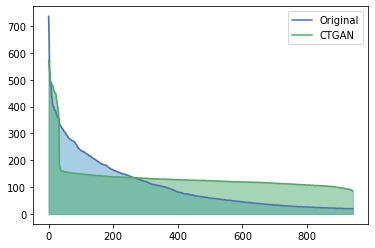

In [32]:
plot_distribution(df_users_orig, df_users_syn)

## 250 epochs

In [52]:
# load synthetic data
syn_data =  pd.read_csv('output/synthetic_data/syn_complete_070421_0935_combined_partition.csv', sep=',', encoding='latin-1')
syn_data = syn_data[['user', 'item', 'rating']]

### Rating distribution

C:\Anaconda\envs\recsys\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


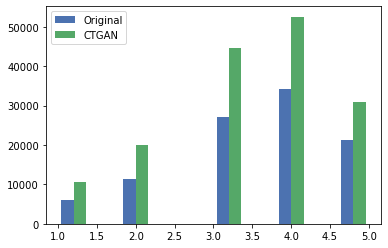

In [53]:
# plot rating distribution
plt.hist([orig_data['rating'], syn_data['rating']], label=['Original', 'CTGAN'])
plt.legend(loc='upper left')

### Item distribution

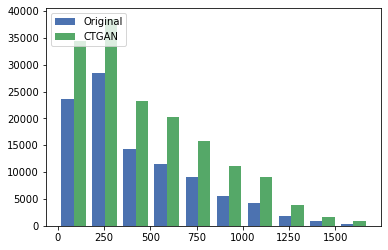

In [54]:
plt.hist([orig_data['item'], syn_data['item']], label=['Original', 'CTGAN'])
plt.legend(loc='upper left')

In [55]:
df_items_orig = orig_data.groupby('item').size().reset_index(name='counts')
df_items_orig = df_items_orig.sort_values(by='counts', ascending=False)

In [56]:
df_items_syn = syn_data.groupby('item').size().reset_index(name='counts')
df_items_syn = df_items_syn.sort_values(by='counts', ascending=False)

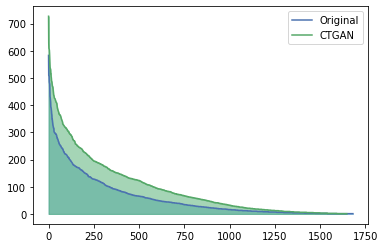

In [57]:
plot_distribution(df_items_orig, df_items_syn)

### User Distribution

In [58]:
df_users_orig = orig_data.groupby('user').size().reset_index(name='counts')
df_users_orig = df_users_orig.sort_values(by='counts', ascending=False)

In [59]:
df_users_syn = syn_data.groupby('user').size().reset_index(name='counts')
df_users_syn = df_users_syn.sort_values(by='counts', ascending=False)

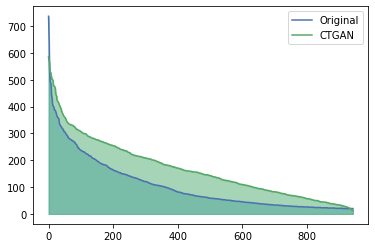

In [60]:
plot_distribution(df_users_orig, df_users_syn)

## 500 epochs

In [3]:
# load synthetic data
syn_data =  pd.read_csv('output/synthetic_data/syn_complete_130421_1120_combined_partition_500eps_300bs.csv', sep=',', encoding='latin-1')
syn_data = syn_data[['user', 'item', 'rating']]

### Rating distribution

C:\Anaconda\envs\recsys\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


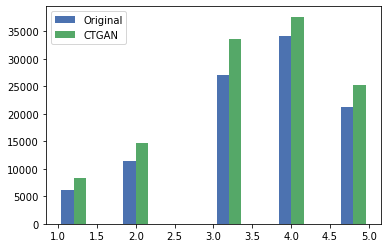

In [4]:
# plot rating distribution
plt.hist([orig_data['rating'], syn_data['rating']], label=['Original', 'CTGAN'])
plt.legend(loc='upper left')

### Item distribution

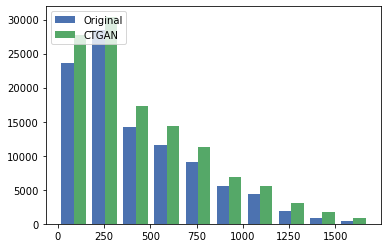

In [5]:
plt.hist([orig_data['item'], syn_data['item']], label=['Original', 'CTGAN'])
plt.legend(loc='upper left')

In [6]:
df_items_orig = orig_data.groupby('item').size().reset_index(name='counts')
df_items_orig = df_items_orig.sort_values(by='counts', ascending=False)

In [7]:
df_items_syn = syn_data.groupby('item').size().reset_index(name='counts')
df_items_syn = df_items_syn.sort_values(by='counts', ascending=False)

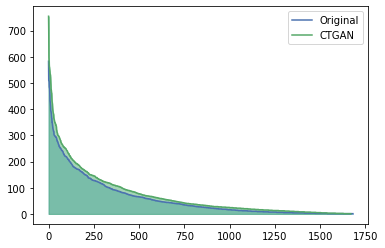

In [11]:
plot_distribution(df_items_orig, df_items_syn)

### User Distribution

In [12]:
df_users_orig = orig_data.groupby('user').size().reset_index(name='counts')
df_users_orig = df_users_orig.sort_values(by='counts', ascending=False)

In [13]:
df_users_syn = syn_data.groupby('user').size().reset_index(name='counts')
df_users_syn = df_users_syn.sort_values(by='counts', ascending=False)

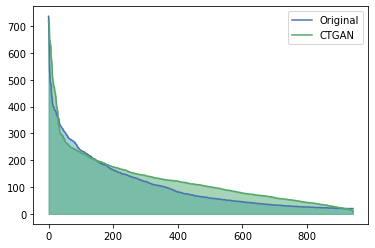

In [14]:
plot_distribution(df_users_orig, df_users_syn)